In [6]:
#Importing Libraries

import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder #turns out we didn't need them

In [7]:
data = pd.read_csv('heart.csv')

In [8]:
#Overview on the Data

In [9]:
data.shape

#303 Samples 
#14 Features

(303, 14)

In [10]:
#unique features

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
data.info()
#Encoding is not needed because we have no categorical data that we need to convrt into numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
data.head()
#just to make sure we don't need data enncoding

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
#Our Target variable is the ('target') column (either you have a heart disease or not)

In [15]:
#DATA PREPROCESSING

In [16]:
#Check for Null Values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#Thankfully we have no nulls in our data so we don't need to handle null data in this case

In [18]:
#Scalling numerical Features

scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [19]:
#Remove duplicates if there are any

print("Duplicates before removal:")
data.shape

Duplicates before removal:


(303, 14)

In [20]:
data = data.drop_duplicates()
data.shape

(302, 14)

In [21]:
#The Samples Decreased to 302 from 303. So there was one Duplicated Row that we removed


#it also may not be a duplicate and we just had 2 people with the exact same metrics

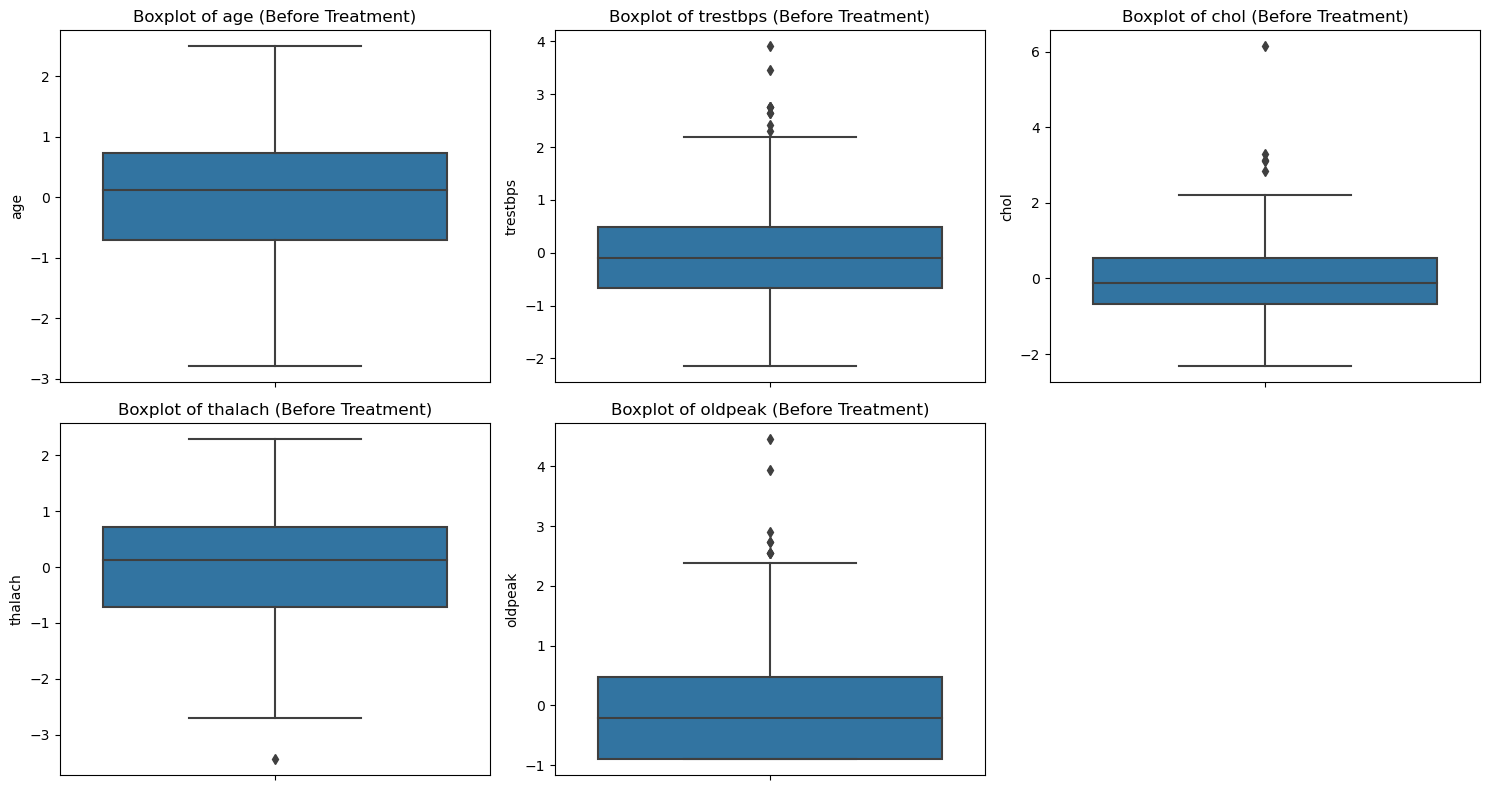

In [22]:
#HANDLING OUTLIERS

# Visualize the outliers using box plots before treatment
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Boxplot of {feature} (Before Treatment)')
plt.tight_layout()
plt.show()


#So we conclude that we didn't have outliers only in the age column
#But we have outliers in all of the other features

In [23]:
#identify outliers by z-score
#we decided to impute the outliers instead of removing them because we have only 302 samples and we don't want to decrease the quality of our model
# We could also used the iqr method to. handle the outliers

In [24]:
# Function to detect outliers using Z-score for the trestbps column
def detect_outliers_z_score(df, column):
    threshold = 3
    mean = df[column].mean()
    std_dev = df[column].std()
    df['Z_Score'] = (df[column] - mean) / std_dev
    df['Outlier'] = abs(df['Z_Score']) > threshold
    return df





df_outliers_z_score = detect_outliers_z_score(data, 'trestbps')
print("DataFrame with Z-score Outliers for the trestbps column :")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])
print("\n//////////////////////////////\n")



df_outliers_z_score = detect_outliers_z_score(data, 'chol')
print("DataFrame with Z-score Outliers for the chol column :")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])
print("\n//////////////////////////////\n")


df_outliers_z_score = detect_outliers_z_score(data, 'thalach')
print("DataFrame with Z-score Outliers for the thalach column :")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])
print("\n//////////////////////////////\n")


df_outliers_z_score = detect_outliers_z_score(data, 'oldpeak')
print("DataFrame with Z-score Outliers for the oldpeak column :")
print(df_outliers_z_score[df_outliers_z_score['Outlier']])
print("\n//////////////////////////////\n")

DataFrame with Z-score Outliers for the trestbps column :
          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
223  0.180175    0   0  3.905165  0.806568    1        0 -0.727976      1   
248 -0.040403    1   1  3.448262  0.709940    0        0  1.983316      0   

      oldpeak  slope  ca  thal  target   Z_Score  Outlier  
223  2.553921      0   2     3       0  3.894313     True  
248 -0.896862      2   1     3       0  3.438820     True  

//////////////////////////////

DataFrame with Z-score Outliers for the chol column :
          age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
28   1.172774    0   2  0.478391  3.299555    1        0  0.321556      0   
85   1.393352    0   2 -0.949431  6.140401    0        0  0.452748      0   
220  0.952197    0   0  1.049520  3.106300    0        0  0.190365      0   
246  0.180175    0   0  0.135714  3.144951    0        0  0.015443      1   

      oldpeak  slope  ca  thal  target   Z_Score  Outlier

In [25]:
# Imputing the Outliers by the median
def impute_outliers(df, column):
    median_value = df.loc[~df['Outlier'], column].median()
    df.loc[df['Outlier'], 'Value'] = median_value
    return df

# Apply imputing outliers method
df_imputed_outliers = impute_outliers(data, 'trestbps')
df_imputed_outliers = impute_outliers(data, 'chol')
df_imputed_outliers = impute_outliers(data, 'thalach')
df_imputed_outliers = impute_outliers(data, 'oldpeak')

In [26]:
# Imputing the Outliers
def impute_outliers(df):
    median_value = df.loc[~data['Outlier'], 'Value'].median()
    df.loc[df['Outlier'], 'Value'] = median_value
    return df


df_imputed_outliers = impute_outliers(data)

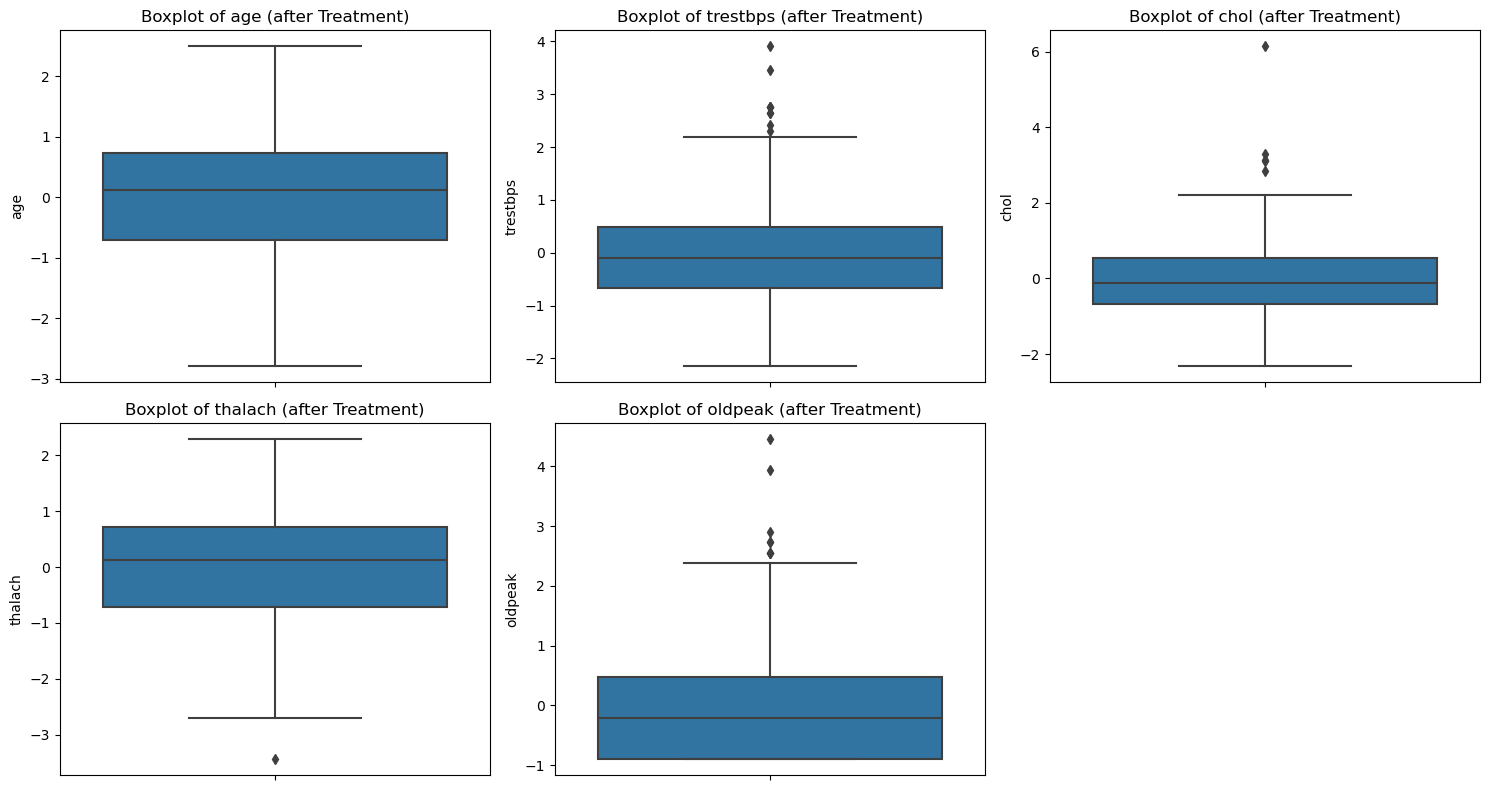

In [27]:
# Visualize the outliers using box plots after treatment
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y= data[feature])
    plt.title(f'Boxplot of {feature} (after Treatment)')
plt.tight_layout()
plt.show()

In [28]:
data.shape
#We did handle the outliers without losing any samples from our data

(302, 17)

In [29]:
#Drop the value column which we don't need again
data = data.drop(columns=['Value'])
data = data.drop(columns=['Outlier'])
data = data.drop(columns=['Z_Score'])


In [30]:
data.shape

(302, 14)

In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [32]:
#MODEL SELECTION

In [33]:
#Since our target Column is the 'Target' column in our data and it is either 0 or 1 
#So we Will select a classification model for our data
#another reason for that is that classification models are the widly used in the medical industry
#either a knn model or a logistic regression model
#so we will try both of them to see who's better and select the model with higher accuracy

In [34]:
#firstly we will try the Knn model

#import the libraries of the knn model and accuracy testing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
# Define x and y to feature and target
X = data.drop(columns=['target'])
y = data['target'] 

In [36]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [37]:
knn = KNeighborsClassifier(n_neighbors= 3) # <-- 3 is a hyperparameter we can try 5 as well after we evaluate our score  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
#Calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print evaluation
print("\n//////////////////////////////\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n//////////////////////////////\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8852459016393442

//////////////////////////////

Confusion Matrix:
[[26  3]
 [ 4 28]]

//////////////////////////////

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



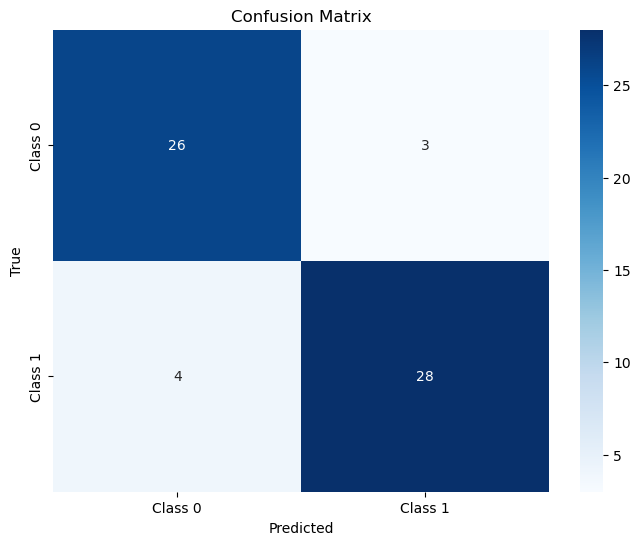

In [39]:
#Confusion matrix heatmap for better visualisation
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
#The accuracy is pretty good but we can also try 5 neighbors to see if the accuracy increases

In [41]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
#Calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Print evaluation
print("\n//////////////////////////////\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n//////////////////////////////\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8688524590163934

//////////////////////////////

Confusion Matrix:
[[25  4]
 [ 4 28]]

//////////////////////////////

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



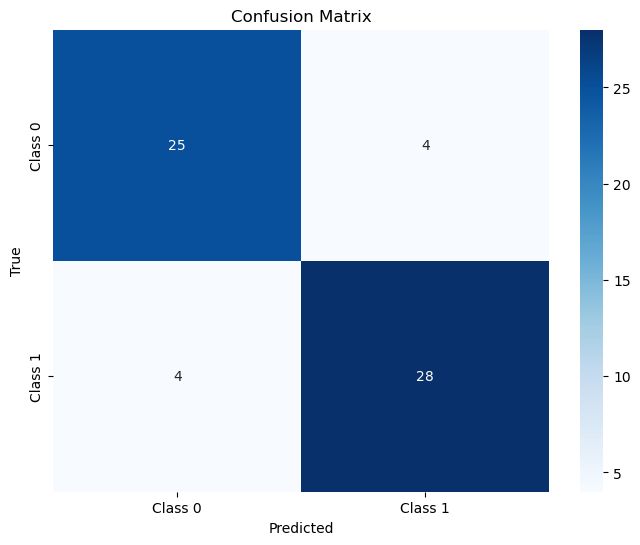

In [43]:
#Confusion matrix heatmap for better visualisation
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
#The accuracy increased when we used 5 neighbors so 5 neighborsis a better choice

In [45]:
#I Think we can further improve our accuracy so let's try the Logistic regression model on our data

In [46]:
#Import the library of the logistic regression
from sklearn.linear_model import LogisticRegression

In [47]:
regressor = LogisticRegression()  
regressor.fit(X_train, y_train)

LogisticRegression()

In [48]:
# Predict and evaluate
y_pred = regressor.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print evaluation
print("\n//////////////////////////////\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n//////////////////////////////\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8360655737704918

//////////////////////////////

Confusion Matrix:
[[25  4]
 [ 6 26]]

//////////////////////////////

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



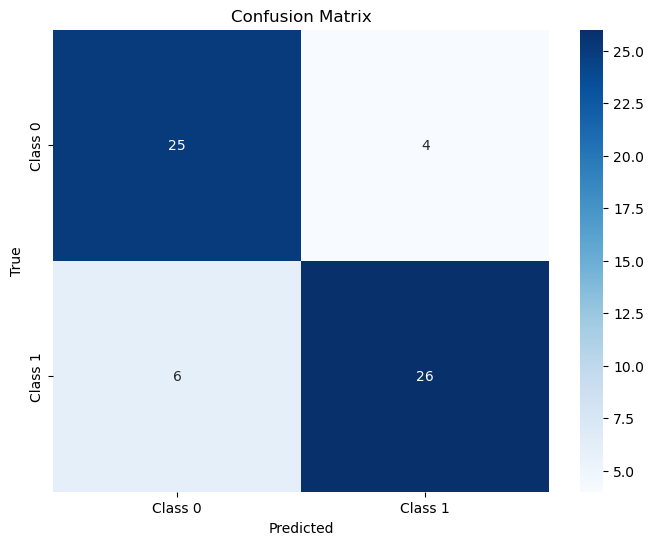

In [49]:
#Confusion matrix heatmap for better visualisation
cm = confusion_matrix(y_test, y_pred, labels=regressor.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
#We Can Observe that when we applied the knn model with 3 neighbors, it had a significantly higher accuracy
#than the knn model with 5 neighbors

#and we didn't detect any Overfitting by the confusion matrix

# So based on these observations we can conclude that the knn model with 3 neighbors is the best model we can
#use for this data